This code was based on in the following references:

[1] "Modelling the Social Interactions in Grey Wolf Optimizer" published in 2016 by Rodrigo C. Lira, Mariana Macedo, Hugo Valadares Siqueira, Ronaldo Menezes and Carmelo Bastos-Filho

[2] D. P. F. Cruz, R. D. Maia, and L. N. de Castro, “A framework for the analysis and synthesis of swarm intelligence algorithms,” Journal of Experimental & Theoretical Artificial Intelligence, vol. 0, no. 0, pp. 1–23, 2020.

[3] M. Oliveira, C. J. A. Bastos-Filho, and R. Menezes, “Using network science to assess particle swarm optimizers,” Social Network Analysis and Mining, vol. 5, no. 1, p. 3, Jan. 2015.

### Imports

In [1]:
import os
import sys
import csv
import random
import copy
import math
import time
import json
import datetime
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
from random import randint
from IPython.display import display, HTML
from google.colab import drive, files
%matplotlib inline
plt.rcParams["figure.figsize"] = (18,9)
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42
warnings.filterwarnings("ignore")

### Connection google drive

In [2]:
drive.mount('/content/drive', force_remount=True) #  Connect to drive
FOLDERNAME = 'POLI/decimo/tcc/Algoritms/IN-abs/' #  Set folder that have the datasts
assert FOLDERNAME is not None, "[!] Enter the foldername."
sys.path.append('/content/drive/My Drive/{}'.format(FOLDERNAME)) #  Locale the foldeer

%cd /content/drive/My\ Drive/$FOLDERNAME

Mounted at /content/drive
/content/drive/My Drive/POLI/decimo/tcc/Algoritms/IN-abs


## Analysis IN

### Functions to use in analysis

In [3]:
dim = [15, 30]
font_size_out = 10
optimizer = "VGWO"
filepath = os.path.dirname(os.path.abspath('IN-abs'))

def sum_in(np_in):
  sum_np = np.zeros(np_in[0].shape)
  for i, t in enumerate(np_in):
    sum_np += t
    # sys.stdout.write('\r')
    # sys.stdout.write(", ".join(str(x) for x in sum_np.tolist()))
    # sys.stdout.flush()  
    # iterate through columns
    # for x, l in enumerate(t):
    #   for y, v in enumerate(l):
    #     sum_np[x, y] += np_in[i, x, y]
  return sum_np

def show_in_best_exec(func, d, opt, iter=100):
  file_json = open(f"{filepath}/{d}d/{opt}_{func}_exec.json")
  exec_json = json.load(file_json)["array"]
  bests_scores = [exec_json[ie]['alpha_scores'][-1] for ie in range(30)]
  idx_best_exec = bests_scores.index(min(bests_scores))
  iteration_examples = [idx_best_exec]
  for ie in iteration_examples:
    label = ord('A')
    plt.style.use('ggplot')

    fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(8,3))
    fig.subplots_adjust(wspace=0.1, hspace=.2)

    data = np.array(exec_json[ie]['in'][iter])
    data = np.rot90(data, k=1)
    fit = exec_json[ie]['alpha_scores']
    normalized_data = data / np.sqrt((np.sum(data**2)))

    title = f"Simulation #{ie}\nMean: {data.mean()} - STD: {data.std()}\nFunc: {func}\nFitness: {fit}"
    row = 0
    my_y = 1.16
    my_x = 0
    ax[row].text(my_x, my_y, f"{func}({d}) - Iter {iter} in Execution {ie}", fontsize=font_size_out*1.5, transform=ax[row].transAxes)
    my_y = 1.05
    ax[row].text(my_x,my_y,f"{chr(label)}",fontsize=font_size_out*1.5,transform=ax[row].transAxes,weight="bold")

    sns.set(font_scale=1.2)
    sns.heatmap(normalized_data, cmap="Spectral_r", xticklabels=False,
                yticklabels=False, ax=ax[row], cbar=True, vmin=0,
                cbar_kws={"pad": 0.01})

    cbar = ax[row].collections[0].colorbar
    cbar.ax.tick_params(labelsize=font_size_out)

    #ax[row].invert_yaxis()
    ax[row].set_xticks([0,len(normalized_data[0])])
    ax[row].set_yticks([0,len(normalized_data[0])])
    ax[row].set_xticklabels(["1",str(len(normalized_data[0]))])
    ax[row].set_yticklabels(["1",str(len(normalized_data[0]))])
    ax[row].tick_params('x', colors="black", labelsize=font_size_out*1.5)
    ax[row].tick_params('y', colors="black", labelsize=font_size_out*1.5)
    ax[row].set_xlabel("wolf",fontsize=font_size_out*1.5, color='black', labelpad=-15)
    ax[row].set_ylabel("wolf",fontsize=font_size_out*1.5, color='black', labelpad=-15)    
    ax[row].invert_yaxis()

    cax = plt.gcf().axes[-1]
    cax.tick_params(labelsize=font_size_out*1)

    ax[row].axhline(y=0, color='k', linewidth=2)
    ax[row].axhline(y=30, color='k', linewidth=2)
    ax[row].axvline(x=0, color='k', linewidth=2)
    ax[row].axvline(x=30, color='k', linewidth=2)

    label += 1

    #sns.despine()    
    row = 1
    fmt = ticker.FormatStrFormatter("%.2f")
    plt.style.use('seaborn-whitegrid')

    my_x = 0
    my_y = 1.05

    ax[row].text(my_x, my_y, f"{chr(label)}", fontsize=font_size_out*1.5, transform=ax[row].transAxes,weight="bold")
    sns.set(font_scale=1.2)

    sns.distplot(np.hstack(normalized_data), color="#009E73", bins=50,
                 hist=True, label="simulation", kde_kws={"lw": 3},
                 hist_kws={"edgecolor": "#009E73","linewidth": 0.5, "alpha": 0.7}, ax=ax[row])
    ax[row].set_xlabel("Weight ($w$)",fontsize=font_size_out*1.5, color='black')
    ax[row].set_ylabel("$F_w$",fontsize=font_size_out*1.5, color='black')    
    ax[row].set_yticklabels(ax[row].get_yticks(), size = font_size_out*1)
    ax[row].set_xticklabels(ax[row].get_xticks(), size = font_size_out*1)
    ax[row].set_xticklabels(ax[row].get_xticklabels(), rotation=60)
    ax[row].xaxis.set_major_formatter(fmt)
    ax[row].yaxis.set_label_position("right")
    ax[row].yaxis.tick_right()

    #fig.subplots_adjust(wspace=0.27)
    #fig.tight_layout()
    #plt.savefig(histogram_folder+fname, bbox_inches='tight')
    plt.show()

def exec_func_graph(func, d, opt, limit_exec=30, until=None):
  file_json = open(f"{filepath}/{d}d/{opt}_{func}_exec.json")
  exec_json = json.load(file_json)
  # print(exec_json)
  exec_json = exec_json["array"]
  for i, e in enumerate(exec_json[:limit_exec]):
    best_fit = e['alpha_scores'][-1]
    best_pos = e['alpha_positions'][-1]
    data = np.array(e['in'])
    # data = np.rot90(data, k=1)
    data = data / np.sqrt((np.sum(data**2)))
    normalized_data = sum_in(data[:until] if until else data)
    # normalized_data = total_in / np.sqrt((np.sum(total_in**2)))

    label = ord('A')
    plt.style.use('ggplot')
    
    fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(8,3))
    fig.subplots_adjust(wspace=0.1, hspace=.2)
    
    title = f"Simulation #{i}\nMean: {data.mean()} - STD: {data.std()}\nFunc: {func}\nFitness: {best_fit}"
    row = 0
    my_y = 1.16
    my_x = 0
    ax[row].text(my_x, my_y, f"{func}({d})", fontsize=font_size_out*1.5, transform=ax[row].transAxes)
    my_y = 1.05
    ax[row].text(my_x,my_y,f"{chr(label)}",fontsize=font_size_out*1.5,transform=ax[row].transAxes,weight="bold")

    sns.set(font_scale=1.2)
    sns.heatmap(normalized_data, cmap="Spectral_r", xticklabels=False,
                yticklabels=False, ax=ax[row], cbar=True, vmin=0,
                cbar_kws={"pad": 0.01})

    cbar = ax[row].collections[0].colorbar
    cbar.ax.tick_params(labelsize=font_size_out)

    #ax[row].invert_yaxis()
    ax[row].set_xticks([0,len(normalized_data[0])])
    ax[row].set_yticks([0,len(normalized_data[0])])
    ax[row].set_xticklabels(["1",str(len(normalized_data[0]))])
    ax[row].set_yticklabels(["1",str(len(normalized_data[0]))])
    ax[row].tick_params('x', colors="black", labelsize=font_size_out*1.5)
    ax[row].tick_params('y', colors="black", labelsize=font_size_out*1.5)
    ax[row].set_xlabel("wolf",fontsize=font_size_out*1.5, color='black', labelpad=-15)
    ax[row].set_ylabel("wolf",fontsize=font_size_out*1.5, color='black', labelpad=-15)    
    ax[row].invert_yaxis()

    cax = plt.gcf().axes[-1]
    cax.tick_params(labelsize=font_size_out*1)

    ax[row].axhline(y=0, color='k', linewidth=2)
    ax[row].axhline(y=30, color='k', linewidth=2)
    ax[row].axvline(x=0, color='k', linewidth=2)
    ax[row].axvline(x=30, color='k', linewidth=2)

    label += 1

    #sns.despine()    
    row = 1
    fmt = ticker.FormatStrFormatter("%.2f")
    plt.style.use('seaborn-whitegrid')

    my_x = 0
    my_y = 1.05

    ax[row].text(my_x, my_y, f"{chr(label)}", fontsize=font_size_out*1.5, transform=ax[row].transAxes,weight="bold")
    sns.set(font_scale=1.2)

    sns.distplot(np.hstack(normalized_data), color="#009E73", bins=50,
                 hist=True, label="simulation", kde_kws={"lw": 3},
                 hist_kws={"edgecolor": "#009E73","linewidth": 0.5, "alpha": 0.7}, ax=ax[row])
    ax[row].set_xlabel("Weight ($w$)",fontsize=font_size_out*1.5, color='black')
    ax[row].set_ylabel("$F_w$",fontsize=font_size_out*1.5, color='black')    
    ax[row].set_yticklabels(ax[row].get_yticks(), size = font_size_out*1)
    ax[row].set_xticklabels(ax[row].get_xticks(), size = font_size_out*1)
    ax[row].set_xticklabels(ax[row].get_xticklabels(), rotation=60)
    ax[row].xaxis.set_major_formatter(fmt)
    ax[row].yaxis.set_label_position("right")
    ax[row].yaxis.tick_right()

    #fig.subplots_adjust(wspace=0.27)
    #fig.tight_layout()
    #plt.savefig(histogram_folder+fname, bbox_inches='tight')
    plt.show()

### Examples

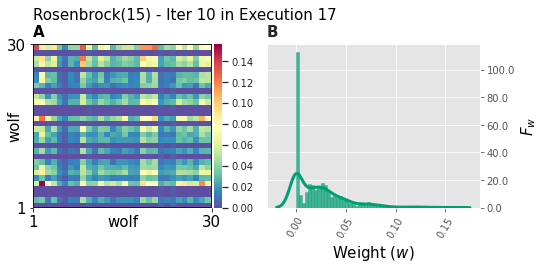

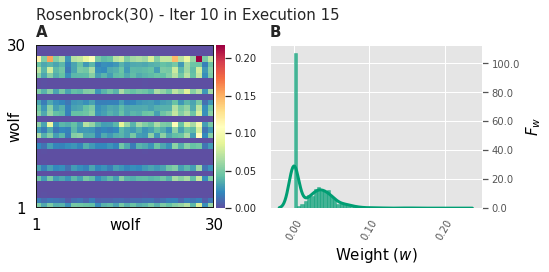

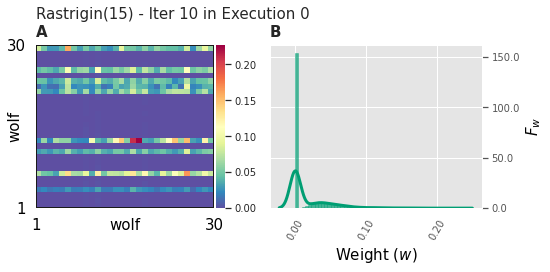

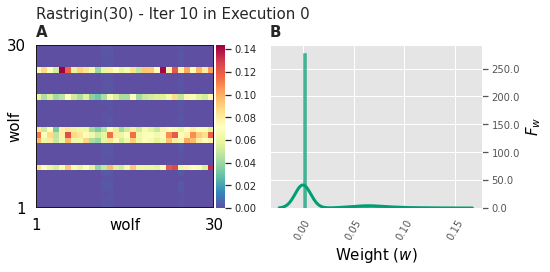

In [4]:
show_in_best_exec("Rosenbrock", 15, optimizer, iter=10)
show_in_best_exec("Rosenbrock", 30, optimizer, iter=10)

show_in_best_exec("Rastrigin", 15, optimizer, iter=10)
show_in_best_exec("Rastrigin", 30, optimizer, iter=10)

### Sphere

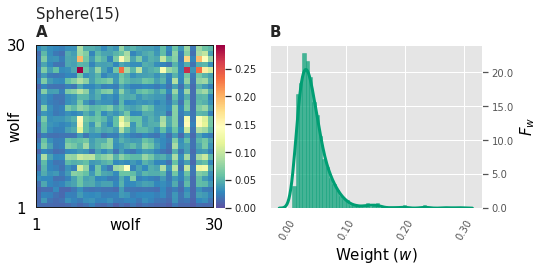

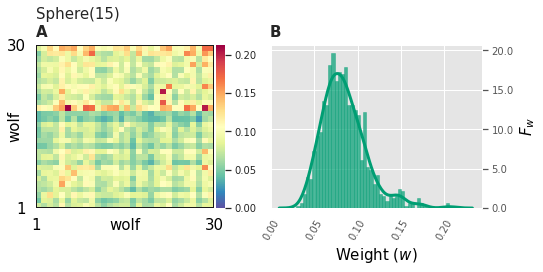

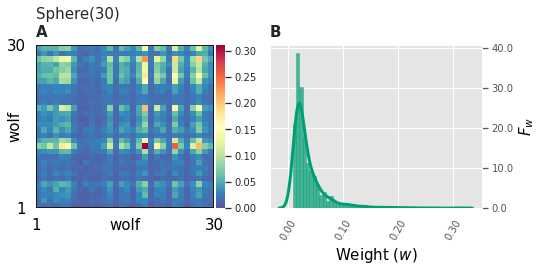

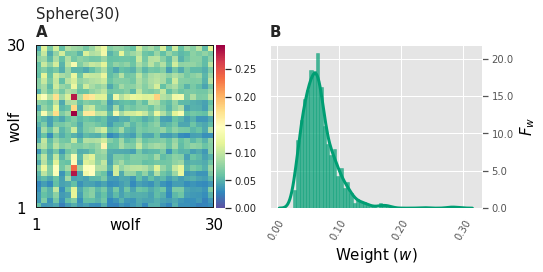

In [5]:
func = "Sphere"
for d in dim:
  # print(f"{func} Interaction Network with {d}")
  exec_func_graph(func, d, optimizer, limit_exec=2)

### Rosenbrock

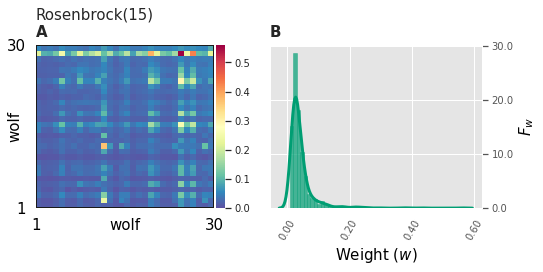

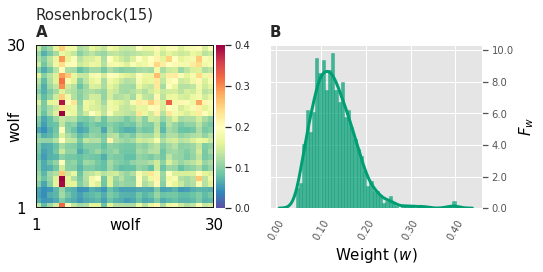

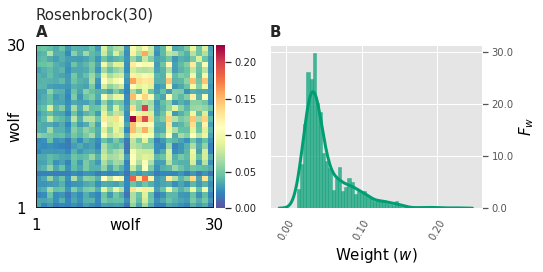

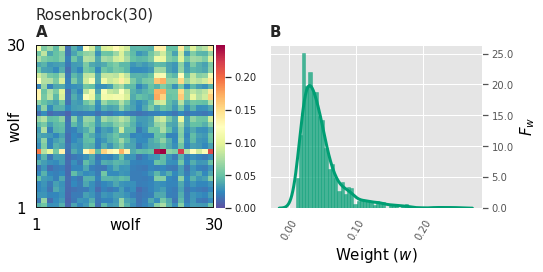

In [6]:
func = "Rosenbrock"
for d in dim:
  # print(f"{func} Interaction Network with {d}")
  exec_func_graph(func, d, optimizer, limit_exec=2)

### Rastrigin

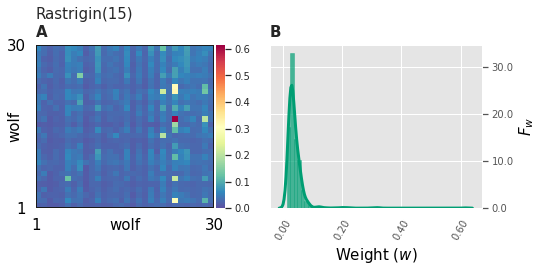

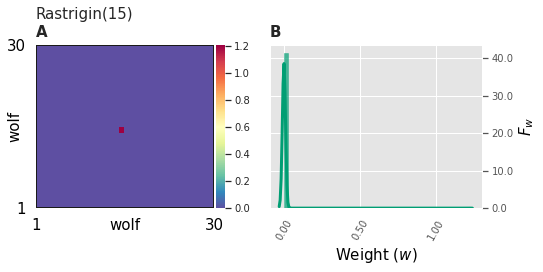

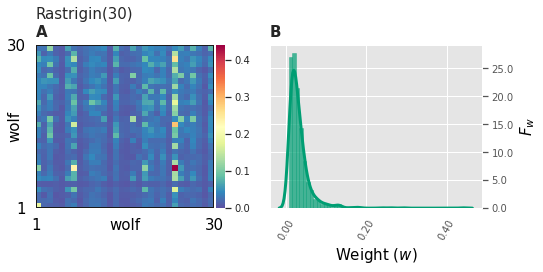

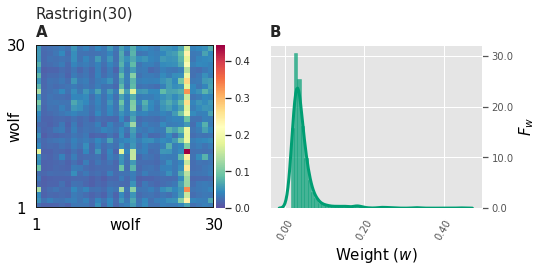

In [7]:
func = "Rastrigin"
for d in dim:
  # print(f"{func} Interaction Network with {d}")
  exec_func_graph(func, d, optimizer, limit_exec=2)

### Schwefel

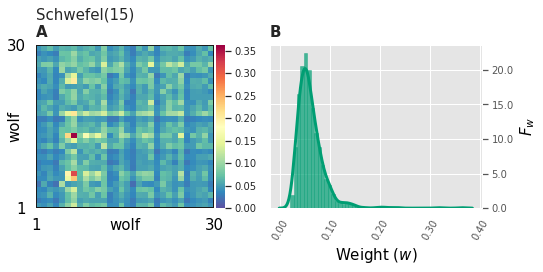

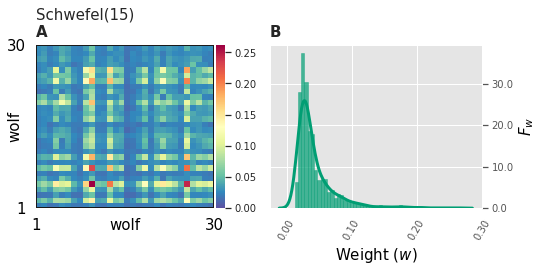

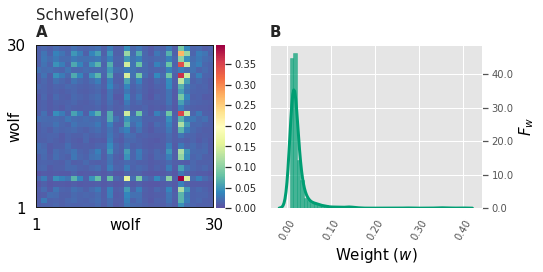

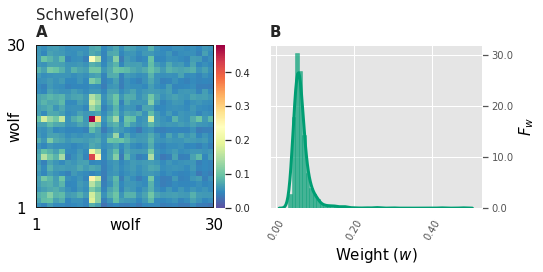

In [8]:
func = "Schwefel"
for d in dim:
  # print(f"{func} Interaction Network with {d}")
  exec_func_graph(func, d, optimizer, limit_exec=2)

### Griewank

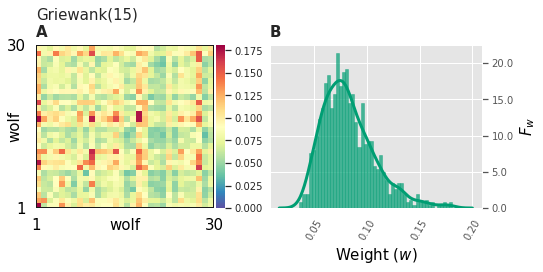

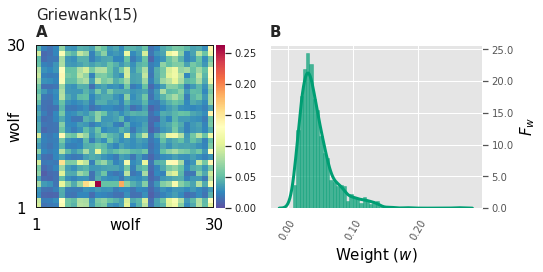

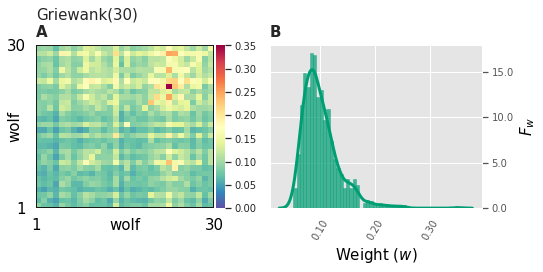

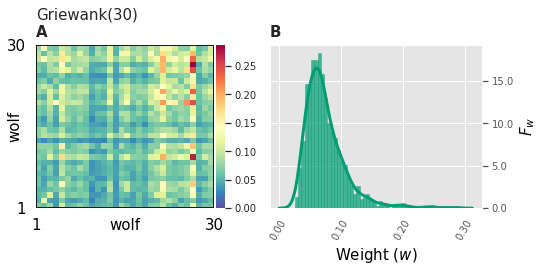

In [9]:
func = "Griewank"
for d in dim:
  # print(f"{func} Interaction Network with {d}")
  exec_func_graph(func, d, optimizer, limit_exec=2)

### Ackley

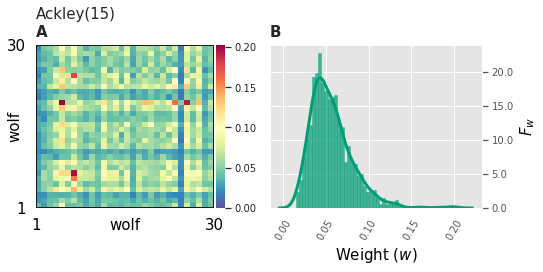

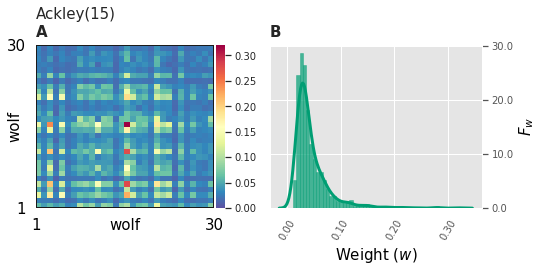

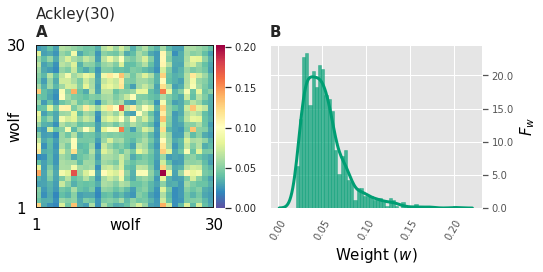

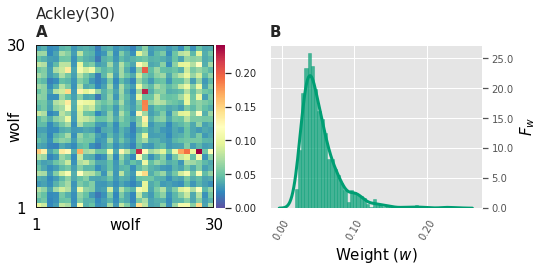

In [10]:
func = "Ackley"
for d in dim:
  # print(f"{func} Interaction Network with {d}")
  exec_func_graph(func, d, optimizer, limit_exec=2)